# TensorFlow Neural Network

In [1]:
import numpy as np
import tensorflow as tf

In [3]:
np.random.seed(101)
tf.set_random_seed(101)

In [4]:
rand_a = np.random.uniform(0, 100, (5,5))

In [5]:
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [8]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[ 91.31535577],
       [ 80.7920151 ],
       [ 40.29978307],
       [ 35.72243428],
       [ 95.28767147]])

In [9]:
a = tf.placeholder(tf.float32)

In [10]:
b = tf.placeholder(tf.float32)

In [11]:
add_op = a + b

In [12]:
mul_op = a * b

In [15]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    print(add_result)
    
    mul_result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
    print("\n")
    print(mul_result)

[[ 142.95521545  148.3821106    94.16277313  108.46752167  159.8430481 ]
 [ 164.18170166  111.48863983  170.15332031  152.94641113   99.78591156]
 [  95.72254181   75.5129776    58.4890213   118.85995483  136.84811401]
 [  58.95780182   44.07857895   96.07727814  108.62171173   63.34631729]
 [ 163.81829834  147.07441711  100.13612366  109.07460022  113.98442078]]


[[ 4715.51220703  5211.07128906   260.01339722  1566.25610352
   6257.63085938]
 [ 6737.22070312  2480.04199219  7219.6796875   5829.49853516
   1534.55505371]
 [ 2233.52514648  1419.08410645   733.0223999   3165.95776367
   3890.87646484]
 [  830.02386475   298.50177002  2156.02197266  2604.13964844   986.7923584 ]
 [ 6530.12451172  4934.63867188   461.99786377  1313.72387695  1781.5690918 ]]


# Example Neural Network

In [16]:
n_features = 10
n_dense_neurons = 3

In [17]:
x = tf.placeholder(tf.float32, (None, n_features))

In [19]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

In [20]:
xW = tf.matmul(x, W)

In [21]:
z = tf.add(xW, b)

In [22]:
a = tf.sigmoid(z)

In [23]:
init = tf.global_variables_initializer()

In [24]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})

In [25]:
print(layer_out)

[[ 0.63707596  0.33803546  0.02317664]]


## Simple Regression Example

In [28]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)
x_data

array([  0.41186709,   0.5849351 ,   1.0749565 ,   1.98663632,
         4.8574204 ,   6.49235324,   7.17744793,   8.23308089,
         8.66259572,  10.46978601])

In [30]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)
y_label

array([-0.88941714,  0.50817234,  1.4051899 ,  1.97783999,  5.65635852,
        4.29586617,  6.98831548,  8.17031789,  8.52271468,  8.53972303])

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

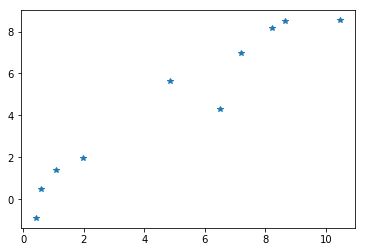

In [33]:
plt.plot(x_data, y_label, "*")

# y = mx + b

In [34]:
np.random.rand(2)

array([ 0.84221941,  0.38493775])

In [35]:
m = tf.Variable(0.84)
b = tf.Variable(0.39)

In [36]:
error = 0

In [37]:
for x,y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

In [39]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [41]:
init = tf.global_variables_initializer()

In [51]:
with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 10
    
    for i in range(training_steps):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

In [52]:
x_test = np.linspace(-1, 11, 10)
y_pred_plot = final_slope * x_test + final_intercept

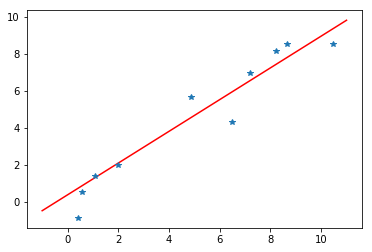

In [53]:
plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, "*")